### Bike Sharing Assignment

#### Problem Statement

For a US bike-sharing provider company **BoomBikes**, understand the factors on which the demand for these shared bikes depends. More specifically, to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
* 1. Which variables are significant in predicting the demand for shared bikes.
* 2. How well those variables describe the bike demands

Given information about the data:
Variables like 'weathersit' and 'season' have values as 1, 2, 3, 4 which have specific labels associated with them - Read from Data dictionary.
Column 'yr' with two values 0 and 1 indicating the years 2018 and 2019 respectively.
The variable 'casual' = the number casual users who have made a rental
The variable 'registered' = total number of registered users who have made a booking on a given day
The variable 'cnt' = total number of bike rentals, including both casual and registered.
*The model should be built taking this 'cnt' as the target variable

**Model Evaluation:**
When done with model building and residual analysis and predictions are made on the test set, following two lines of code must be used to calculate the R-squared score on the test set.

`from sklearn.metrics import r2_score
r2_score(y_test, y_pred)`

### Step 1: Data - EDA - Reading, Understanding, Visualizing and Preparation

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# read and observe the data
bike = pd.read_csv(r"C:\Users\xrl1qsf\Desktop\IIITB\BikeSharing_Assignment\day.csv")
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
print(bike.shape)
print(bike.info())

(730, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB
None


In [4]:
# Data conversion - Bringing numerical variables to Categorical for better understanding

bike[['season']] = bike[['season']].apply(lambda x: x.map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'}))
bike[['weathersit']] = bike[['weathersit']].apply(lambda x: x.map({1:'good', 2:'fair', 3:'bad', 4:'severe'}))
bike[['mnth']] = bike[['mnth']].apply(lambda x: x.map({1:'jan', 2:'feb', 3:'mar', 4:'apr', 5:'may', 6:'jun', 
                                                       7:'jul', 8:'aug', 9:'sep', 10:'oct', 11:'nov', 12:'dec'}))
bike[['weekday']] = bike[['weekday']].apply(lambda x: x.map({0: 'sun', 1:'mon', 2:'tue', 
                                                             3:'wed', 4:'thu', 5:'fri', 6:'sat'}))
bike.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,0,jan,0,sat,0,fair,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,0,jan,0,sun,0,fair,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,Spring,0,jan,0,thu,1,good,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,Spring,0,jan,0,fri,1,fair,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,Spring,0,jan,0,sat,0,fair,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,Spring,0,jan,0,sun,0,good,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,Spring,0,jan,0,mon,1,good,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [5]:
# Column 'instant' is the record index and has no impact on the target variable, and can be dropped
# Columns 'casual' and 'registered' are getting covered as their total in the target column 'cnt',
# hence are redundant and can be dropped.
# Column 'dteday' is also getting covered by columns 'yr','mnth' and 'weekday'.
#Moreover analysis won't be done based on day-to-day Dates. Hence this column can be dropped too.

bike.drop(['instant','casual','registered','dteday'], axis=1,inplace=True)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,jan,0,sat,0,fair,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,jan,0,sun,0,fair,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600


In [6]:
# Observe the data overall - Size, Shape, Columns, Null-Values, Duplicates, etc
print('Data Size: ' , bike.size)
print('Data Shape: ' , bike.shape)
bike.info()

Data Size:  8760
Data Shape:  (730, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [7]:
bike.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [8]:
# Observations: There are-
# 1. 730 rows in the data with no null values
# 2. 12 columns after removing the unnecessary or redundant columns, of which 'cnt' is the target column
# 3. 4 purely numerical columns which may be affecting the target column 'cnt'
# 4. 3 columns which appear to be numerical but in fact are categorical and may be affecting the target column 'cnt'
# 5. 4 purely categorical columns which may be affecting the target column 'cnt'

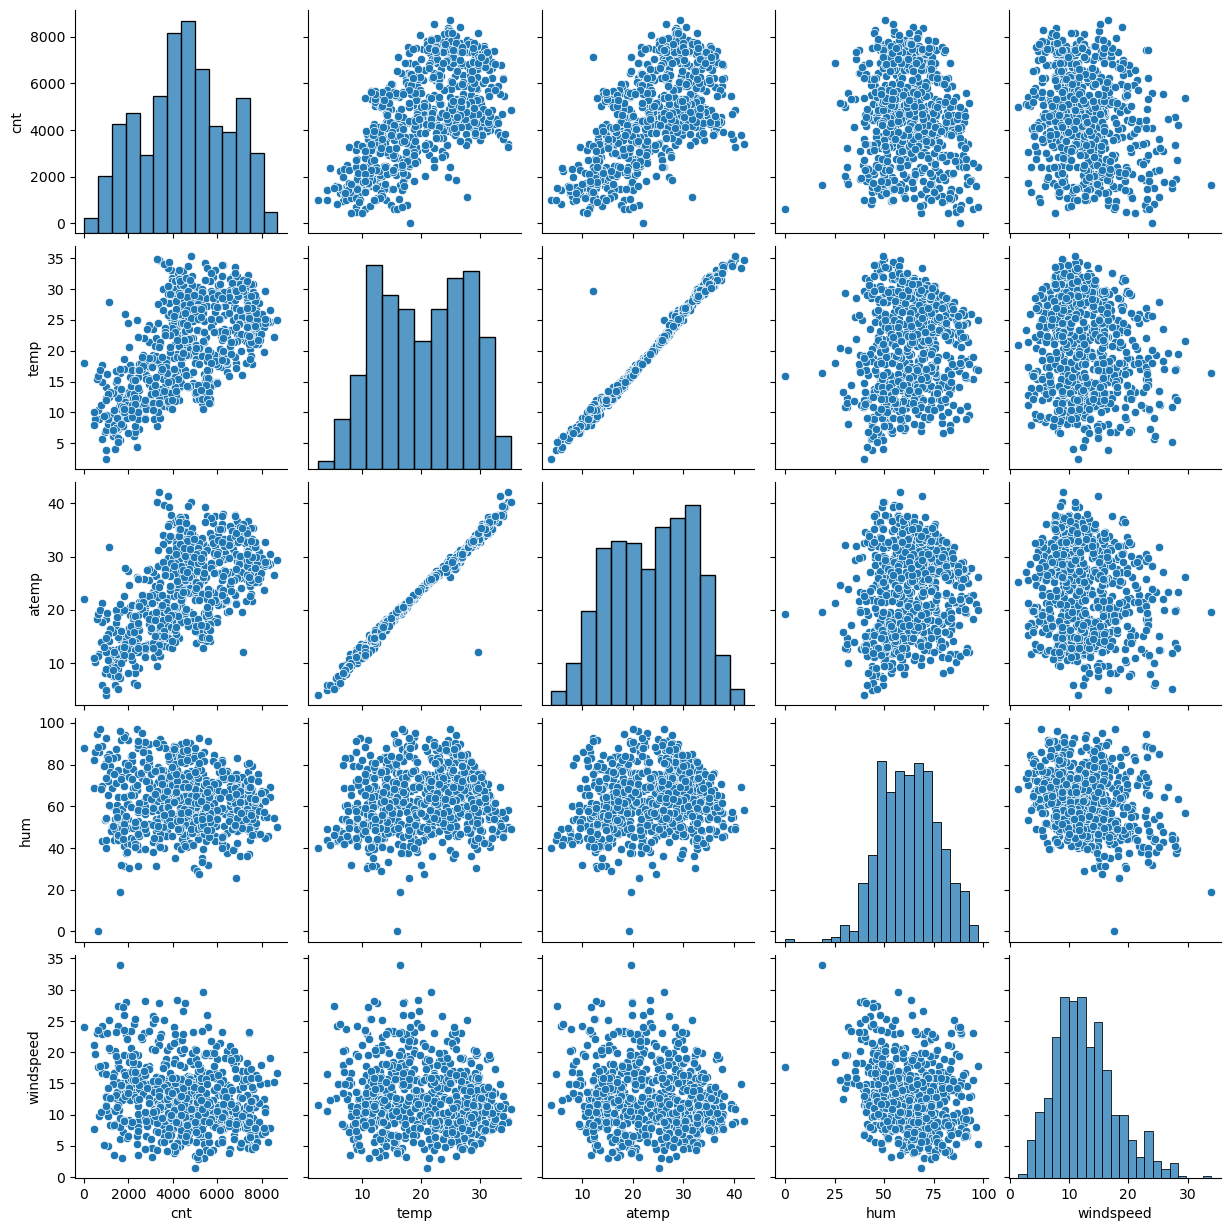

In [9]:
# Observing numerical data with the help of pairplots

sns.pairplot(bike, vars=['cnt', 'temp', 'atemp', 'hum', 'windspeed'])
plt.show()

#### Observations:
1. A very strong linear correlation between 'temp' and 'atemp'
1. There is linear correlation between 'cnt' and 'temp' And 'cnt' and 'atemp' 
1. Other variables do not show any significant relational pattern

Text(0.5, 1.0, 'Boxplot of Bike Rentals by weathersit')

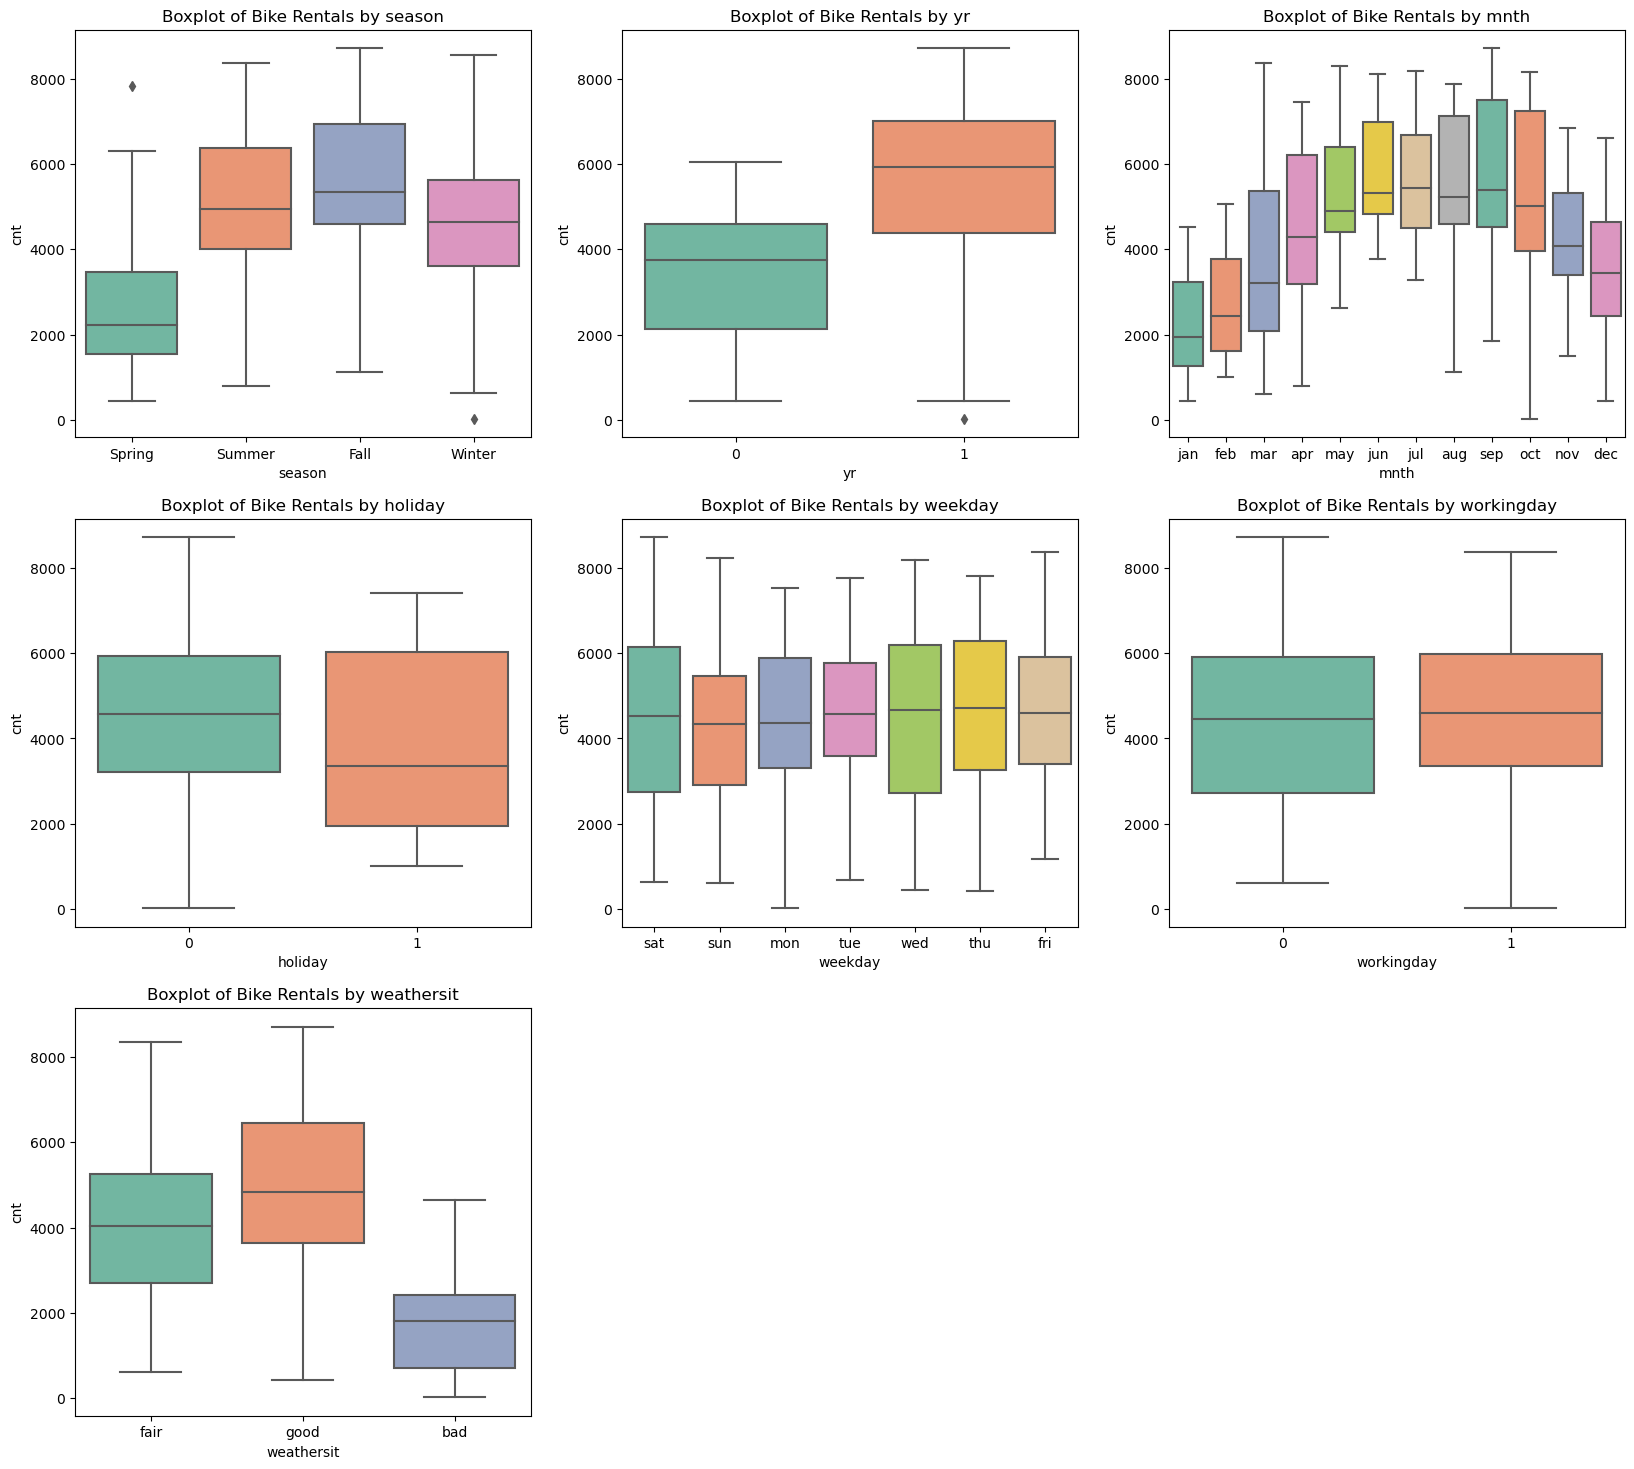

In [10]:
# Observing categorical data with the help of boxplots

plt.figure(figsize=(20, 18))
plt.subplot(3,3,1)
sns.boxplot(x=bike['season'], y=bike['cnt'],data=bike, palette="Set2")
plt.title(f'Boxplot of Bike Rentals by season')
plt.subplot(3,3,2)
sns.boxplot(x=bike['yr'], y=bike['cnt'],data=bike, palette="Set2")
plt.title(f'Boxplot of Bike Rentals by yr')
plt.subplot(3,3,3)
sns.boxplot(x=bike['mnth'], y=bike['cnt'],data=bike, palette="Set2")
plt.title(f'Boxplot of Bike Rentals by mnth')
plt.subplot(3,3,4)
sns.boxplot(x=bike['holiday'], y=bike['cnt'],data=bike, palette="Set2")
plt.title(f'Boxplot of Bike Rentals by holiday')
plt.subplot(3,3,5)
sns.boxplot(x=bike['weekday'], y=bike['cnt'],data=bike, palette="Set2")
plt.title(f'Boxplot of Bike Rentals by weekday')
plt.subplot(3,3,6)
sns.boxplot(x=bike['workingday'], y=bike['cnt'],data=bike, palette="Set2")
plt.title(f'Boxplot of Bike Rentals by workingday')
plt.subplot(3,3,7)
sns.boxplot(x=bike['weathersit'], y=bike['cnt'],data=bike, palette="Set2")
plt.title(f'Boxplot of Bike Rentals by weathersit')

####  Observations:
1. The target variable 'cnt' representing the bike rental count is highest in fall followed by summer compared to spring, and after fall, it starts declining in winter.
1. The 25th percentile of the bike rental count in 2019 was nearly equal to 75th percentile the count in 2018 , implying the increase in the rentals with year.
1. The count shows gradual increase from the months from Jan-Sep; with visible intervals as Jan-Apr and then May-Sep.
     It declines further from Oct-Dec; which is in accordance with the first boxplot showing effect of season on the count.
1. On a Holiday, the rental count is decreased, which may be logical as well, as people might be preferring family time over biking.
1. Weekday or Weekend does not seem to have any significant effect on the rentals.
1. There are no rentals in 'severe' weather, and maximum rentals in 'good' weather, which is quite logical.
1. There are outliers in Season, which need to be treated

#### Outlier Treatment

In [11]:
# Checking outlier in Spring and Winter as seen in boxplot.
# In Spring, Median is around 2000 and Above 6000 seems to be an outlier so this one row can be dropped.

Text(0.5, 1.0, 'Boxplot of Bike Rentals by season')

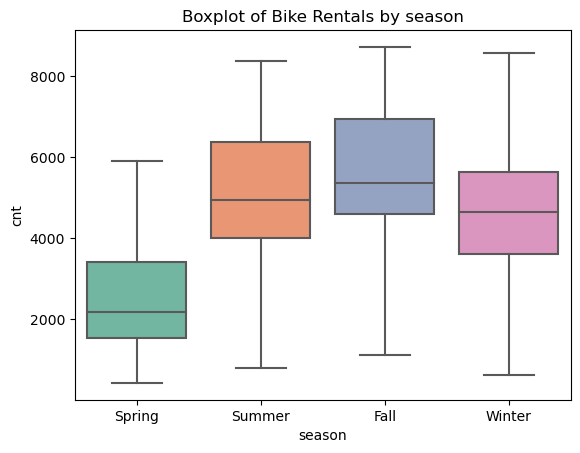

In [12]:
# Dropping cnt > 7000 for spring and cnt < 100 for Winter
bike.drop(bike[(bike.season == "Spring") & (bike.cnt > 6000)].index,inplace=True)
bike.drop(bike[(bike.season == "Winter") & (bike.cnt < 100)].index,inplace=True)
sns.boxplot(x=bike['season'], y=bike['cnt'],data=bike, palette="Set2")
plt.title(f'Boxplot of Bike Rentals by season')

Text(0.5, 1.0, 'Boxplot of Bike Rentals by yr')

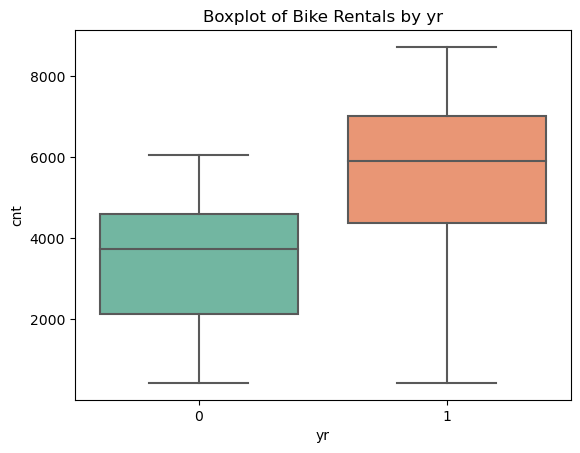

In [13]:
# Dropping cnt < 100 for 2019
bike.drop(bike[(bike.season == "yr") & (bike.cnt < 100)].index,inplace=True)
sns.boxplot(x=bike['yr'], y=bike['cnt'],data=bike, palette="Set2")
plt.title(f'Boxplot of Bike Rentals by yr')

In [14]:
bike.shape

(724, 12)

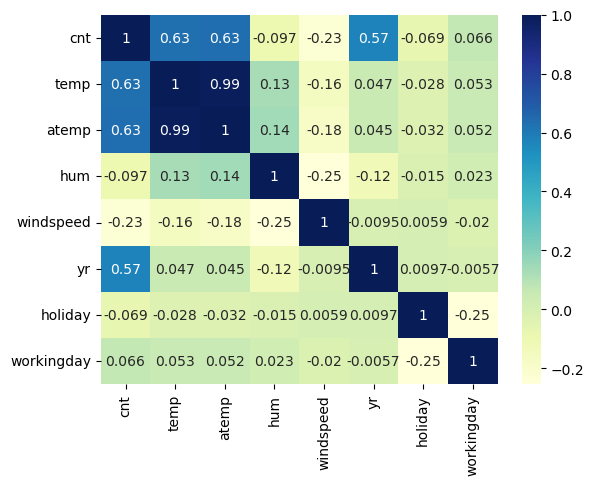

In [15]:
# Find correlation and plot the heatmap showing the correlation between the data variables
sns.heatmap(data=bike[['cnt','temp','atemp','hum','windspeed', 'yr', 'holiday', 'workingday']].corr(),annot=True,cmap='YlGnBu')
plt.show()

#### Observations:
1. There is high correlation between 'temp' and 'atemp', and 'atemp' seems to be derived from the variable 'temp'. IT can also be concluded from the data dictionary, where it is mentioned that 'temp' is temperature in Celsius and 'atemp' is feeling temperature in Celsius. This may cause Multicollinearity and hence Overfitting of the model. Additionally, it introduces redundancy and can make the model complex to interpret. Thus, it is better to drop the column 'atemp' before building the model.
1. There is a negative correlation between rentals and: 1)humidity, 2) windspeed and 3) holiday.
1. Highest correlation of `cnt` is observed with `temp` followed by `yr`.

In [16]:
# Create dummy variables for the categorical columns.
# Since for n values of a column, n-1 dummy variables are sufficient, dropping the first value.
# Append the columns to the original dataframe

season_dummy = pd.get_dummies(bike['season'],drop_first=True)
mnth_dummy = pd.get_dummies(bike['mnth'],drop_first=True)
weekday_dummy = pd.get_dummies(bike['weekday'],drop_first=True)
weathersit_dummy = pd.get_dummies(bike['weathersit'],drop_first=True)

bike = pd.concat([bike,season_dummy,mnth_dummy,weekday_dummy,weathersit_dummy],axis=1)
bike.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'Spring',
       'Summer', 'Winter', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar',
       'may', 'nov', 'oct', 'sep', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed',
       'fair', 'good'],
      dtype='object')

In [17]:
# Drop the original columns for which dummy variables are added
# In addition, 'atemp' column is redundant as it is almost same as 'temp'.
bike.drop(columns=['atemp', 'mnth','weekday','weathersit', 'season'],inplace=True)
bike.info()

<class 'pandas.core.frame.DataFrame'>
Index: 724 entries, 0 to 729
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          724 non-null    int64  
 1   holiday     724 non-null    int64  
 2   workingday  724 non-null    int64  
 3   temp        724 non-null    float64
 4   hum         724 non-null    float64
 5   windspeed   724 non-null    float64
 6   cnt         724 non-null    int64  
 7   Spring      724 non-null    bool   
 8   Summer      724 non-null    bool   
 9   Winter      724 non-null    bool   
 10  aug         724 non-null    bool   
 11  dec         724 non-null    bool   
 12  feb         724 non-null    bool   
 13  jan         724 non-null    bool   
 14  jul         724 non-null    bool   
 15  jun         724 non-null    bool   
 16  mar         724 non-null    bool   
 17  may         724 non-null    bool   
 18  nov         724 non-null    bool   
 19  oct         724 non-null    bool  

In [18]:
bike.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt
count,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000
mean,0.495856,0.029006,0.682320,20.307002,62.697046,12.775240,4500.327348
std,0.500328,0.167938,0.465896,7.534736,14.228656,5.189051,1928.831958
min,0.000000,0.000000,0.000000,2.424346,0.000000,1.500244,431.000000
25%,0.000000,0.000000,0.000000,13.760615,51.979175,9.041851,3157.500000
50%,0.000000,0.000000,1.000000,20.363326,62.562500,12.167066,4540.000000
75%,1.000000,0.000000,1.000000,26.897702,72.958300,15.636209,5908.250000
max,1.000000,1.000000,1.000000,35.328347,97.250000,34.000021,8714.000000


### Step 2: Data Preparation - Train-Test Split, Rescaling
To avoid widely ranged co-efficients for these variables, it is required to bring these variables on a comparable scale.

In [19]:
# 70% of the data is used as training set and 30% of the data is used for testing

np.random.seed(0)            # This is specified so that the train and test data set always have the same rows, respectively
bike_train, bike_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

In [20]:
# Rescaling the numerical variables - temp, hum, windspeed using MinMax Scaler

scaled_vars= ['temp', 'hum', 'windspeed']
scaler = MinMaxScaler()

bike_train[scaled_vars] = scaler.fit_transform(bike_train[scaled_vars])
bike.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,...,oct,sep,mon,sat,sun,thu,tue,wed,fair,good
0,0,0,0,14.110847,80.5833,10.749882,985,True,False,False,...,False,False,False,True,False,False,False,False,True,False
1,0,0,0,14.902598,69.6087,16.652113,801,True,False,False,...,False,False,False,False,True,False,False,False,True,False
2,0,0,1,8.050924,43.7273,16.636703,1349,True,False,False,...,False,False,True,False,False,False,False,False,False,True
3,0,0,1,8.200000,59.0435,10.739832,1562,True,False,False,...,False,False,False,False,False,False,True,False,False,True
4,0,0,1,9.305237,43.6957,12.522300,1600,True,False,False,...,False,False,False,False,False,False,False,True,False,True


In [21]:
bike.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt
count,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000
mean,0.495856,0.029006,0.682320,20.307002,62.697046,12.775240,4500.327348
std,0.500328,0.167938,0.465896,7.534736,14.228656,5.189051,1928.831958
min,0.000000,0.000000,0.000000,2.424346,0.000000,1.500244,431.000000
25%,0.000000,0.000000,0.000000,13.760615,51.979175,9.041851,3157.500000
50%,0.000000,0.000000,1.000000,20.363326,62.562500,12.167066,4540.000000
75%,1.000000,0.000000,1.000000,26.897702,72.958300,15.636209,5908.250000
max,1.000000,1.000000,1.000000,35.328347,97.250000,34.000021,8714.000000


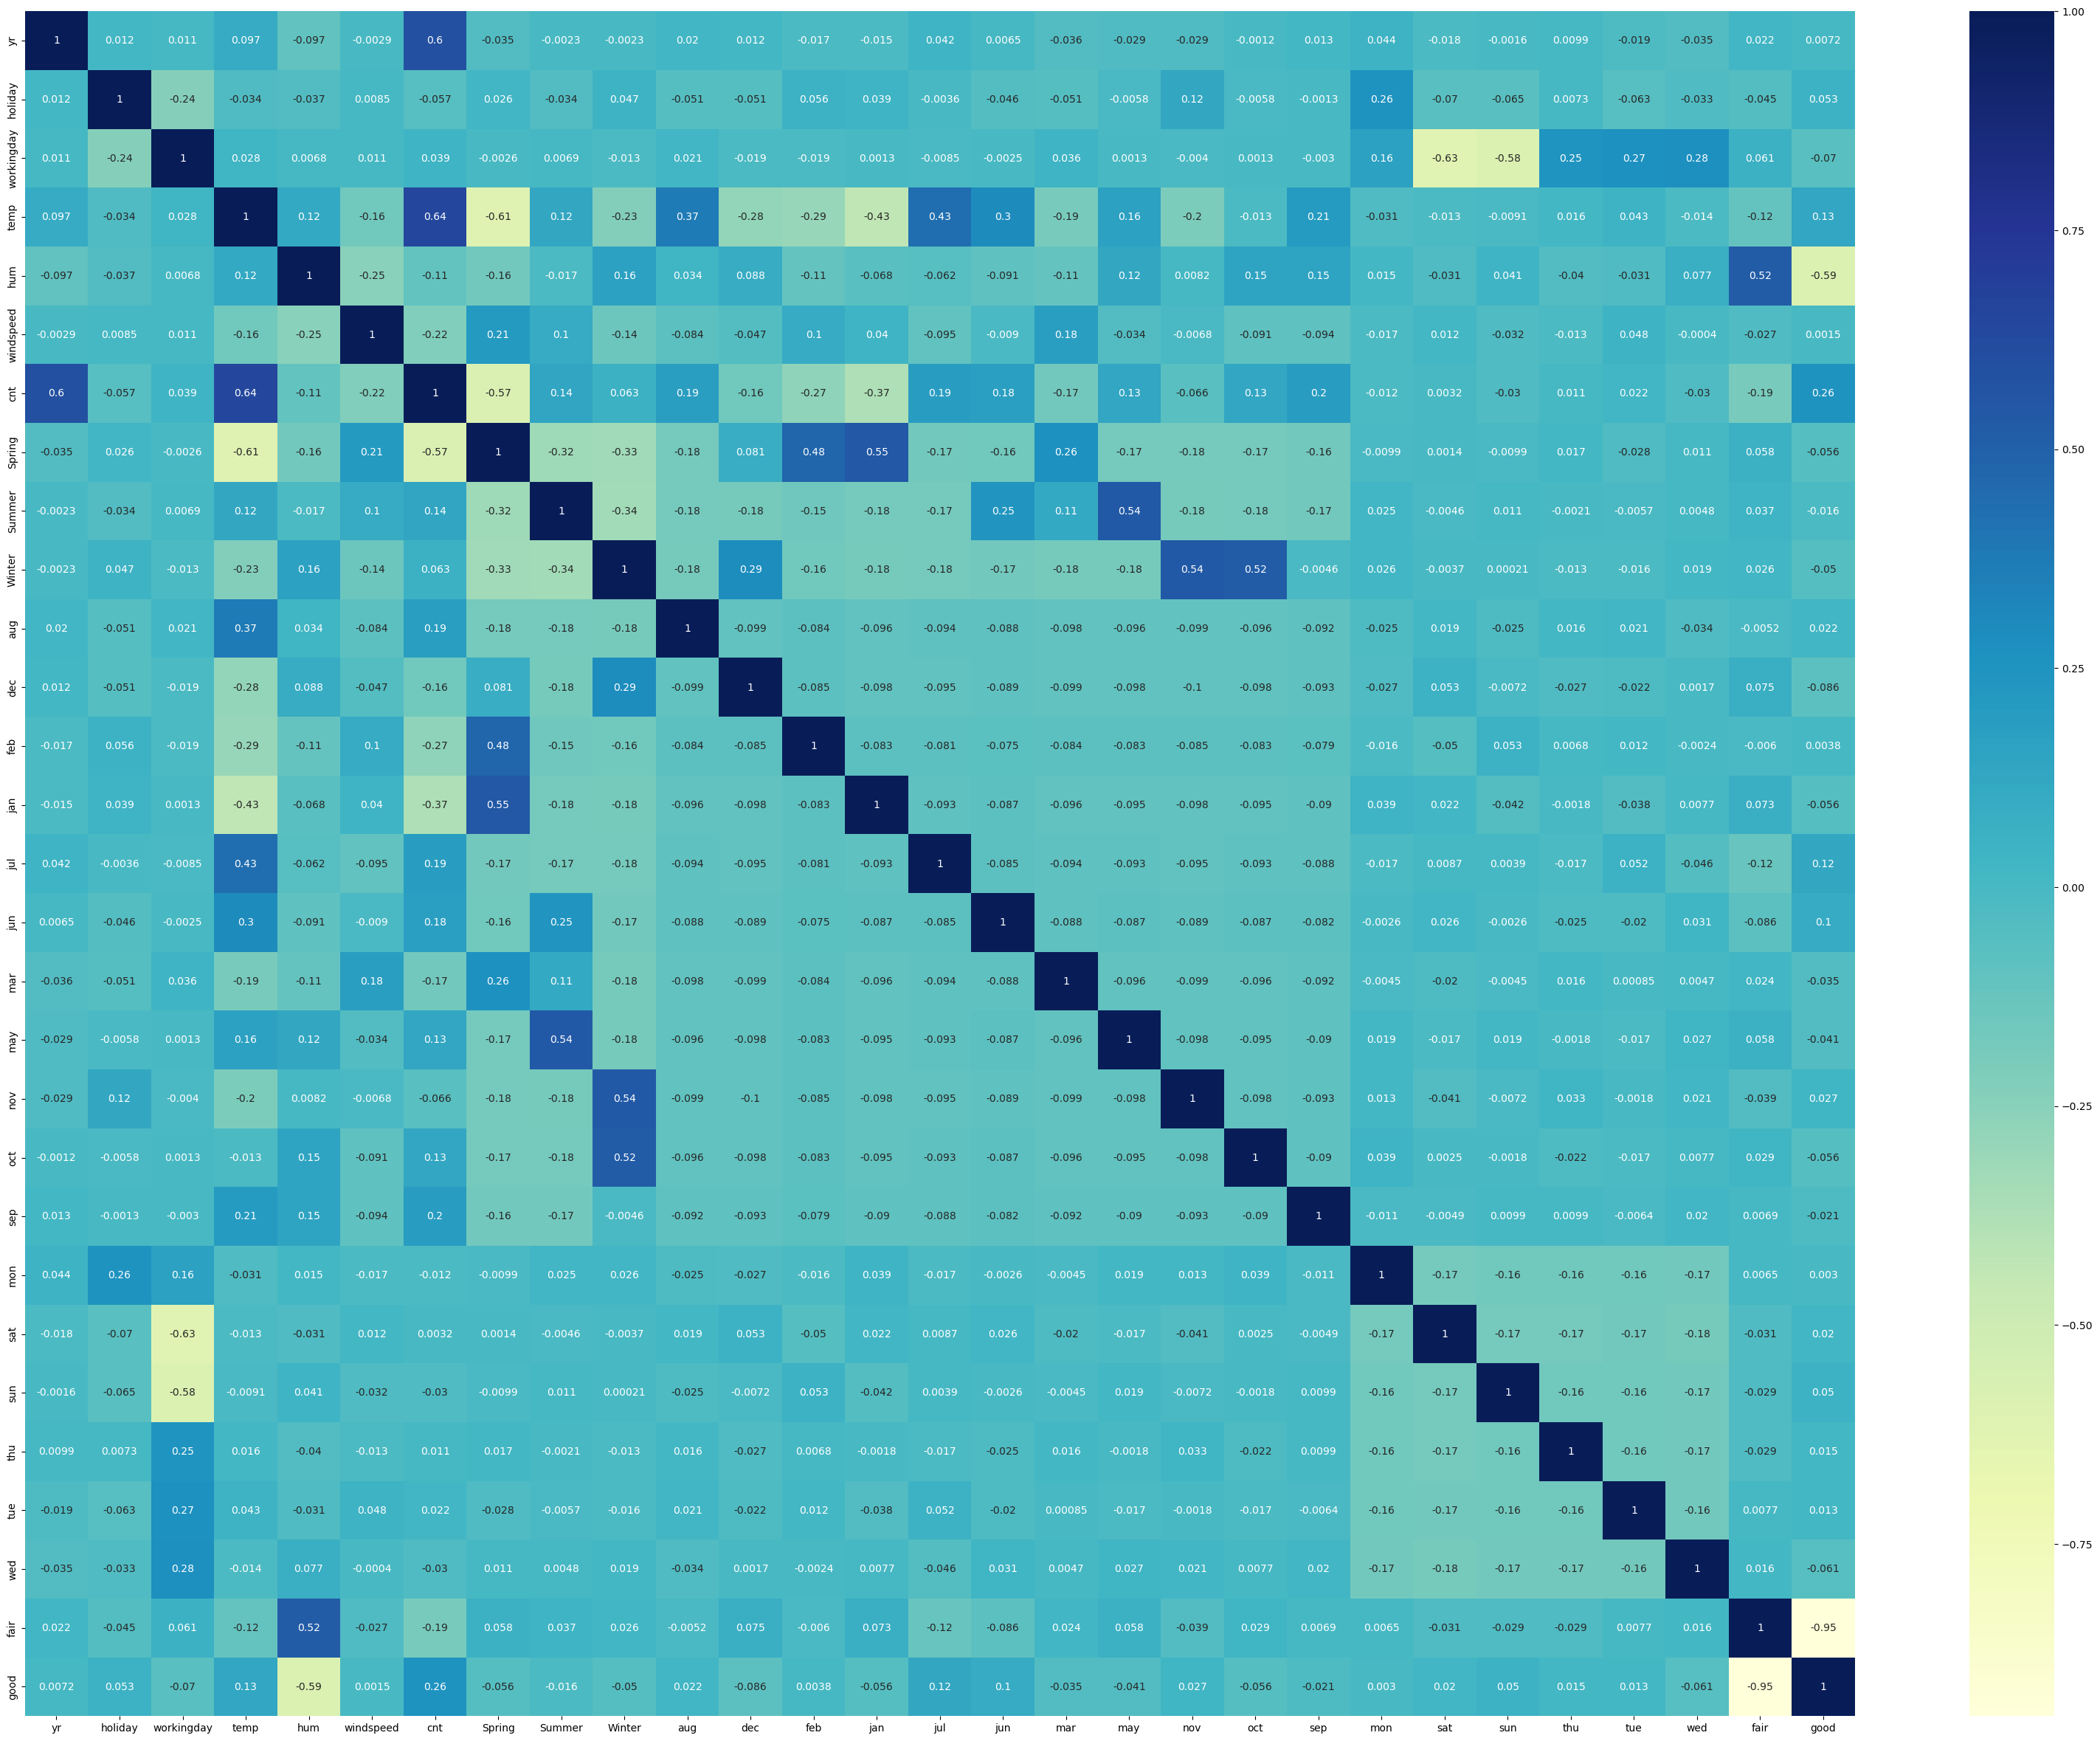

In [22]:
# Checking correlation among the variables before moving on to building the model

cor=bike_train.corr()
plt.figure(figsize = (40, 30))
sns.heatmap(cor,annot=True,cmap='YlGnBu')
plt.show()

#### Observation:
Specific months and seasons have high correlation with the target variable `cnt`.
This can be better understood from the model

### Step 3: Building and Training the Model

In [23]:
# Dividing the Train set into X and Y sets for the model building

y_train = bike_train.pop('cnt')
X_train = bike_train

In [24]:
print(X_train.head())
print(y_train)

     yr  holiday  workingday      temp       hum  windspeed  Spring  Summer  \
418   1        0           1  0.492235  0.570265   0.319480    True   False   
728   1        0           0  0.245101  0.497001   0.663106    True   False   
614   1        0           1  0.802708  0.757069   0.278059   False   False   
111   0        0           1  0.345824  0.750214   0.380981   False    True   
579   1        0           1  0.880586  0.660668   0.372965   False   False   

     Winter    aug  ...    oct    sep    mon    sat    sun    thu    tue  \
418   False  False  ...  False  False  False  False  False   True  False   
728   False  False  ...  False  False  False  False   True  False  False   
614   False  False  ...  False   True  False  False  False  False  False   
111   False  False  ...  False  False  False  False  False  False  False   
579   False   True  ...  False  False  False  False  False  False  False   

       wed   fair   good  
418  False  False   True  
728  False  Fa

### Model 1:
Building the initial model with 15 out of 28 variables

In [25]:
# Using Recursive Feature Elimination (RFE) to initially select the 15 features
# Manual Recursive elimination to make the model better further until finalized 

lm=LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm,n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [26]:
rfe_table=pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)),columns=['Feature', 'rfe_support', 'rank'])
rfe_table.sort_values(by='rank')

,Feature,rfe_support,rank
0,yr,True,1
19,sep,True,1
17,nov,True,1
16,may,True,1
26,fair,True,1
12,jan,True,1
10,dec,True,1
8,Winter,True,1
13,jul,True,1
27,good,True,1


In [27]:
selected_features=list(X_train.columns[rfe.support_])
selected_features

['yr',
 'holiday',
 'temp',
 'hum',
 'windspeed',
 'Spring',
 'Winter',
 'dec',
 'jan',
 'jul',
 'may',
 'nov',
 'sep',
 'fair',
 'good']

In [28]:
# Since there will be recursive eliminations, let's create functions to select features, build the model and check VIFs

In [29]:
#Function to select n features using RFE
def features(n):
    lm=LinearRegression()
    lm.fit(X_train, y_train)
    rfe = RFE(lm,n_features_to_select=n)
    rfe = rfe.fit(X_train, y_train)
    rfe_table=pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)),columns=['Feature', 'rfe_support', 'rank'])
    print(rfe_table.sort_values(by='rank'))
    selected_features=list(X_train.columns[rfe.support_])
    print(selected_features)
    return selected_features

In [30]:
#Function to build a model using statsmodel api - Takes the columns to be selected for model as a parameter
def build_model(selected_features):
    X_train_sm = sm.add_constant(X_train[selected_features])
    lm = sm.OLS(y_train, X_train_sm.astype(float)).fit()
    print(lm.summary())
    return lm

In [31]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def calculate_vif(selected_features):
    df1 = X_train[selected_features]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.astype(float).values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [32]:
build_model(selected_features)
calculate_vif(selected_features)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     191.7
Date:                Fri, 02 Aug 2024   Prob (F-statistic):          7.08e-194
Time:                        12:54:59   Log-Likelihood:                -4070.1
No. Observations:                 506   AIC:                             8172.
Df Residuals:                     490   BIC:                             8240.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1545.0628    391.703      3.944      0.0

In [33]:
# Observations:
# 1. R-squared nad Adjusted R-squared values are 0.854 and 0.850 respectively. 
# 2. There are 4 variables, with VIF value higher than 5, 'hum' having the highest.
# 3. Let's check by selecting 10 features using RFE again.

### Model 2:
Building the initial model with 10 out of 28 variables in iteration 2.

In [34]:
# Using Recursive Feature Elimination (RFE) again to select the 10 features in this iteration
features(10)
build_model(selected_features)
calculate_vif(selected_features)

       Feature  rfe_support  rank
0           yr         True     1
26        fair         True     1
8       Winter         True     1
6       Spring         True     1
5    windspeed         True     1
13         jul         True     1
3         temp         True     1
4          hum         True     1
1      holiday         True     1
27        good         True     1
17         nov        False     2
19         sep        False     3
16         may        False     4
10         dec        False     5
12         jan        False     6
11         feb        False     7
21         sat        False     8
2   workingday        False     9
7       Summer        False    10
18         oct        False    11
20         mon        False    12
9          aug        False    13
14         jun        False    14
23         thu        False    15
24         tue        False    16
15         mar        False    17
22         sun        False    18
25         wed        False    19
['yr', 'holida

In [35]:
# Observations:
# 1. R-squared nad Adjusted R-squared values are still the same, 0.854 and 0.850 respectively. 
# 2. There are still 4 variables, with VIF value higher than 5, 'hum' having the highest.
# 3. Let's try removing the variables manually.

### Model 3:

In [36]:
# Manual elimination of 'hum' based on high VIF value

selected_features=['yr', 'holiday', 'temp', 'windspeed', 'Spring', 'Winter', 'jul', 'fair', 'good']
build_model(selected_features)
calculate_vif(selected_features)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     273.8
Date:                Fri, 02 Aug 2024   Prob (F-statistic):          4.41e-186
Time:                        12:54:59   Log-Likelihood:                -4105.6
No. Observations:                 506   AIC:                             8231.
Df Residuals:                     496   BIC:                             8273.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -37.4098    306.165     -0.122      0.9

### Model 4:

In [37]:
# Based on the pairplots, 'temp' has the highest correlation with the target variable, 
# Hence not removing it despite high VIF value. 2nd variable with high VIF is 'good'.
# Manual elimination of 'good'

selected_features=['yr', 'holiday', 'temp', 'windspeed', 'Spring', 'Winter', 'jul', 'fair']
build_model(selected_features)
calculate_vif(selected_features)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     255.5
Date:                Fri, 02 Aug 2024   Prob (F-statistic):          1.09e-170
Time:                        12:54:59   Log-Likelihood:                -4144.7
No. Observations:                 506   AIC:                             8307.
Df Residuals:                     497   BIC:                             8345.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2010.9419    224.258      8.967      0.0

#### Observations:
1. R-squared and Adjusted R-squared values reduced to 0.804 and 0.801 respectively; but they are still very close to each other and in good range.
2. All the variables are having VIF values less than 5, thereby indicating reduced multicollinearity to low extent.
3. This model seems to be good to accept and perform further cross-checks i.e. residual analysis, predictions on train and then test data.

### Final Model

In [45]:
X_train_sm = sm.add_constant(X_train[selected_features])
lm = sm.OLS(y_train, X_train_sm.astype(float)).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     255.5
Date:                Fri, 02 Aug 2024   Prob (F-statistic):          1.09e-170
Time:                        12:54:59   Log-Likelihood:                -4144.7
No. Observations:                 506   AIC:                             8307.
Df Residuals:                     497   BIC:                             8345.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2010.9419    224.258      8.967      0.0

In [46]:
df1 = X_train[selected_features]
vif = pd.DataFrame()
vif['Features'] = df1.columns
vif['VIF'] = [variance_inflation_factor(df1.astype(float).values, i) for i in range(df1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
print(vif.sort_values(by='VIF',ascending=False))

    Features   VIF
2       temp  4.38
3  windspeed  4.08
0         yr  2.03
4     Spring  1.71
7       fair  1.55
5     Winter  1.37
6        jul  1.35
1    holiday  1.03


In [47]:
# Make predictions on Train data
y_train_pred = lm.predict(X_train_sm)

### Step 4: Residual Analysis - Train Data

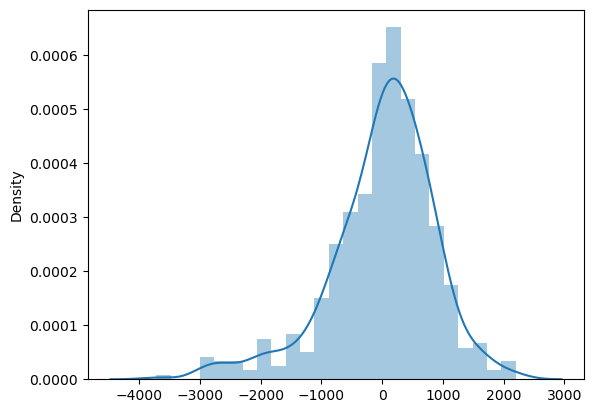

In [48]:
res = y_train - y_train_pred  # Calculate Error terms
plt.figure()                  # Plot Error terms
sns.distplot(res)
plt.show()

#### Observation:
Errors are normally distributed with mean as 0. This successfully validates one of the assumption of the Linear Regression Model.

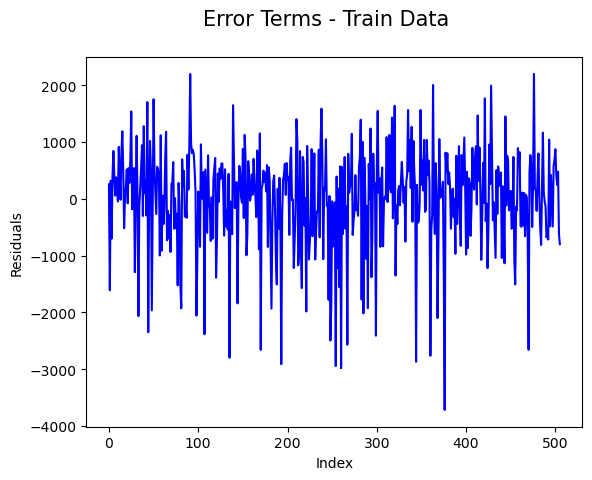

In [49]:
# Look for patterns in residuals in Train set - there shouldn't be any

index = [i for i in range(0,len(X_train_sm),1)]
plt.plot(index,y_train-y_train_pred, color="blue")
plt.suptitle('Error Terms - Train Data', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.show()

#### Observation:
Error Terms do not follow any pattern, which means another assumption of linear regression, that residuals are independent of each other, is verified successfully.

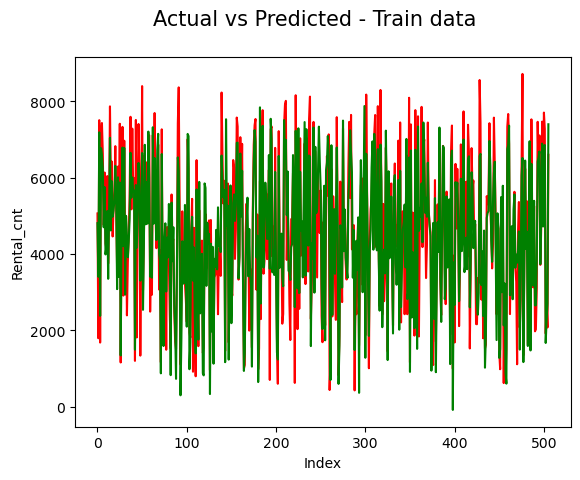

In [50]:
# Observe the actual y-train and predicted y_train values if they follow the same pattern

index = [i for i in range(0,len(X_train_sm),1)]
plt.plot(index,y_train, color="red")
plt.plot(index,y_train_pred, color="green")
plt.suptitle('Actual vs Predicted - Train data', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Rental_cnt')
plt.show()

#### Observation:
The true and predicted data shows similar behaviour. 

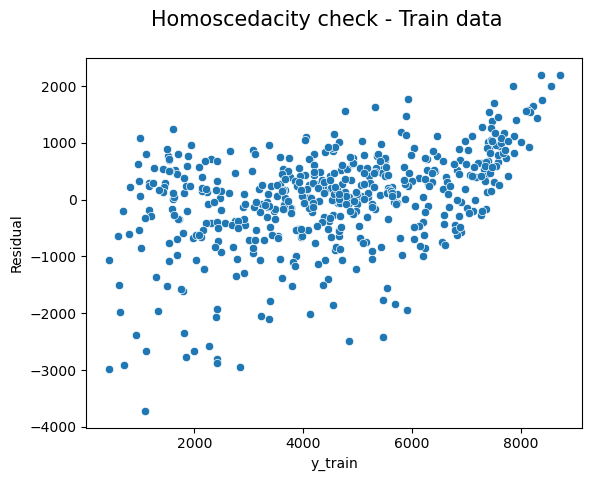

In [51]:
# scatter plot to check the Homoscedacity 

res = (y_train - y_train_pred)
sns.scatterplot(x=y_train, y=res)
plt.suptitle('Homoscedacity check - Train data', fontsize = 15)
plt.xlabel("y_train")
plt.ylabel("Residual")
plt.show()

#### Observation:
The Error terms are having constant variance. Thus, the remaining assumption of the linear regression is also verified.
The model can be said to be well-defined. Let's perform the predictions and evaluations on the unseen data, the Test set.

### Step 5: Predictions and Evaluation on the Test set

In [52]:
# Rescaling the numerical variables - temp, hum, windspeed in Test set
# Only Transform, no Fit
# Creat X-Test, y_test

scaled_vars= ['temp', 'hum', 'windspeed']
selected_features=['yr', 'holiday', 'temp', 'windspeed', 'Spring', 'Winter', 'jul', 'fair']

bike_test[scaled_vars] = scaler.transform(bike_test[scaled_vars])
y_test = bike_test.pop('cnt')
X_test = bike_test

In [53]:
# Make Predictions with the Final Model 

X_test_sm = sm.add_constant(X_test[selected_features])
y_test_pred = lm.predict(X_test_sm)

### Step 6: Residual Analysis - Test Data

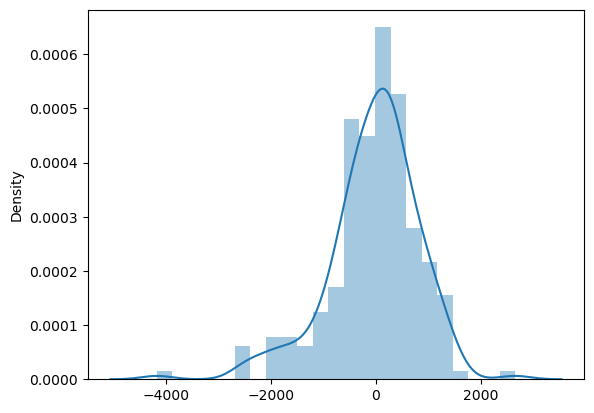

In [54]:
res = y_test - y_test_pred  # Calculate Error terms
plt.figure()                  # Plot Error terms
sns.distplot(res)
plt.show()

#### Observation:
Errors are normally distributed with mean as 0. This successfully validates the first assumption of the Linear Regression Model.

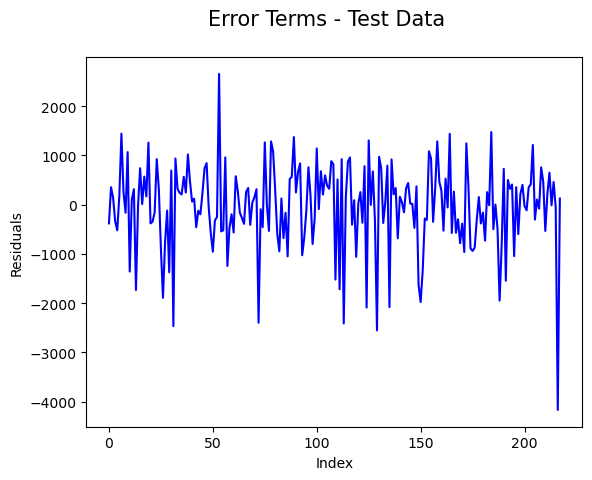

In [55]:
# Look for patterns in residuals in Train set - there shouldn't be any

index = [i for i in range(0,len(X_test_sm),1)]
plt.plot(index,y_test-y_test_pred, color="blue")
plt.suptitle('Error Terms - Test Data', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.show()

#### Observation:
Error Terms do not follow any pattern. Thus, another assumption of linear regression, that residuals are independent of each other, is verified successfully on Test dataset.

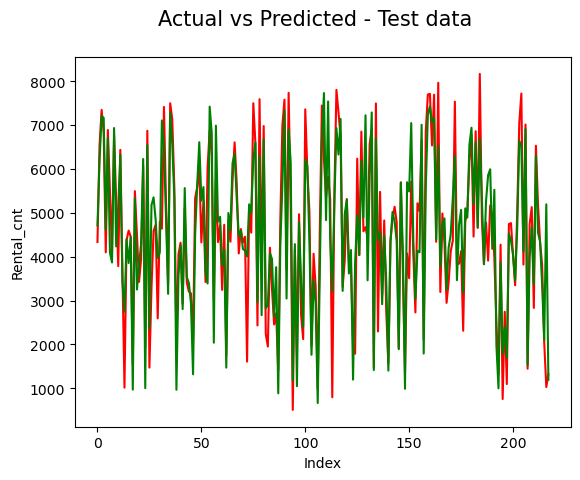

In [56]:
# Observe the actual y-test and predicted y_test values if they follow the same pattern

index = [i for i in range(0,len(X_test_sm),1)]
plt.plot(index,y_test, color="red")
plt.plot(index,y_test_pred, color="green")
plt.suptitle('Actual vs Predicted - Test data', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Rental_cnt')
plt.show()

#### Observation:
The true and predicted data shows similar behaviour. 

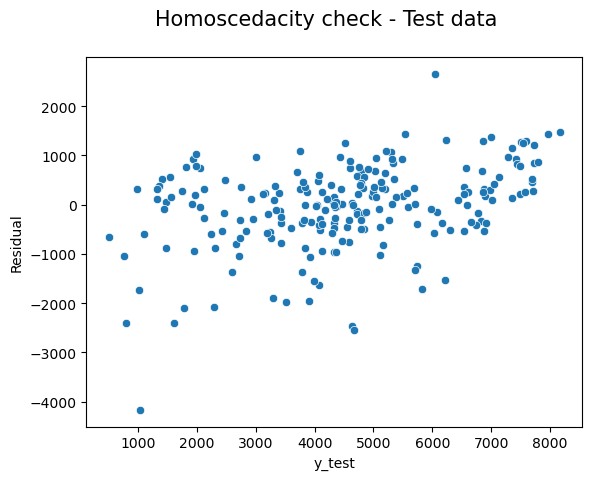

In [57]:
# scatter plot to check the Homoscedacity 

res_test = (y_test - y_test_pred)
sns.scatterplot(x=y_test, y=res)
plt.suptitle('Homoscedacity check - Test data', fontsize = 15)
plt.xlabel("y_test")
plt.ylabel("Residual")
plt.show()


#### Observation:
The Error terms in Test set are having constant variance. Thus, the remaining assumption of the linear regression is also verified.
The model can be said to be well-defined. Let's calculate r2_score.

### Step 7: Calculating Coefficient of Determination-R2 score

In [59]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.7743544156141353

#### Result:
77.43% of the variation in the output variable 'cnt' is  predictable or explained by the input independent variables. 

### Model building using sklearn using the same Train and Test data - for comparison

In [65]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train[selected_features], y_train)

# Make predictions using the training set
y_pred = regr.predict(X_train[selected_features])

In [71]:
#Intercept
print("Intercept: \n",regr.intercept_)

# The coefficients
print("Coefficients: \n", regr.coef_)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_train, y_pred))

Intercept: 
 2010.9418905334555
Coefficients: 
 [ 2172.36951498  -645.95541698  4126.24359179 -1115.41009769
 -1050.27867205   337.90605662  -684.3202791   -630.72500927]
Mean squared error: 762476.32
Coefficient of determination: 0.80


### Observation:
The values of the Intercept, the co-efficients and the R-squared values are almost equal to the values obtained in the linear regression model using OLS method.

In [69]:
# Make predictions using the training set
y_pred_test = regr.predict(X_test[selected_features])

In [72]:
#Intercept
print("Intercept: \n",regr.intercept_)
# The coefficients
print("Coefficients: \n", regr.coef_)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred_test))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred_test))

Intercept: 
 2010.9418905334555
Coefficients: 
 [ 2172.36951498  -645.95541698  4126.24359179 -1115.41009769
 -1050.27867205   337.90605662  -684.3202791   -630.72500927]
Mean squared error: 742354.11
Coefficient of determination: 0.77


### Observation:
This R2_score value is also exactly mathing with the one received for test data using the model built using OLS method.

Hence, it is concluded that the model built using the `selected_features` is consistent and well-behaved on unseen data as well.

--------------

## Model Summary Report

**Dependent variable:** `cnt`.

**The Intercept:**      `2010.9419`

This variable indicates the demand for shared bikes. The company wants to know which variables are significant in predicting the demand for shared bikes. The list of variables is as follows:

**`'yr', 'holiday', 'temp', 'windspeed', 'Spring', 'Winter', 'jul', 'fair', 'good'`**; where

'fair'   implies `weathersit` value = 2 (Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist)<br>
'good'   implies `weathersit` value = 1 (Clear, Few clouds, Partly cloudy, Partly cloudy)<br>
'Spring' implies `season`     value = 1<br>
'Winter' implies `season`     value = 4<br>
'jul'    implies `mnth`       value = 7  in the original data.

**How well those variables describe the bike demands:**
The co-efficients obtained for these variables are as listed below:

| Feature | Co-efficient |
| :- | -: |
| temp | 4126.2436 |
| yr | 2172.3695 |
| windspeed | -1115.4101 |
| Spring | -1050.2787 |
| Winter | 337.9061 |
| holiday | -645.9554 |
| jul | -684.3203|
| fair | -630.725 |
 
 **Hence the regression equation is:** <br><br>
 `cnt` = 2010.9419 + 4126.2436*`temp` + 2172.3695*`yr` - 1115.4101*`windspeed` - 1050.2787*`Spring` + 337.9061*`Winter` <br>- 645.9554*`holiday` - 684.3203*`jul` - 630.725*`fair`


## Interpretations and Recommendations for the company:

1. Temperature (`temp`):
A unit increase in temperature increases the bike rentals count by 4126.2436 units.
1. Year (`yr`):
A unit increase in the year causes 2172.3695 units increase in the demand for bike rentals.
1. WindSpeed (`windspeed`):
A unit decrease in the windspeed leads to 1115.4101 units increase in the bike rentals count, and so on.
These are the top 3 significant variables impacting the bike rentals count variable.

1. The company should consider that the demand for bike rentals is increasing with year. 
1. Company should make efforts to expand business during Spring, and Holidays, especially when the weather conditions are fair i.e. "Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist".